[Pre-MAP Course Website](http://depts.washington.edu/premap/seminar/cohort-14-2018-seminar/) | [Pre-MAP GitHub](https://github.com/UWPreMAP/PreMAP2018) | [Google](https://www.google.com)

# Plotting with `matplotlib` 

*examples in this notebook are based on Nicholas Hunt-Walker's [plotting tutorial](https://github.com/nhuntwalker/teaching/blob/master/plotting_in_python.ipynb) and Jake VanderPlas' [matplotlib tutorial](https://github.com/jakevdp/2014_fall_ASTR599/blob/master/notebooks/06_MatplotlibIntro.ipynb)*

In this notebook we will learn how to make basic plots like scatter plots, histograms and line plots in using matplotlib in python.

## The gallery

If you know what you want a plot to look like, but you don't know the code to make it, go to the [matplotlib gallery](http://matplotlib.org/gallery.html), where you can see examples and see the source code that generated them.

## Basic Plot Commands

Some of the basic plotting commands include
```python
plt.plot()         # all purpose plotting function
plt.errorbar()     # plotting with errorbars
plt.loglog(), plt.semilogx(), plt.semilogy()   # plotting in logarithmic space
```

In [1]:
# we use matplotlib and specifically pyplot
# the convention is to import it like this:
import matplotlib.pyplot as plt 

# We'll also read some data using astropy, so let's import that
import numpy as np 
from astropy.io import ascii

In [2]:
# I'm also using this "magic" function to make my plots appear in this notebook
# Only do this when working with notebooks
%matplotlib inline

Let's make some sample `x` and `y` data, and plot it with the `plt.plot` command:

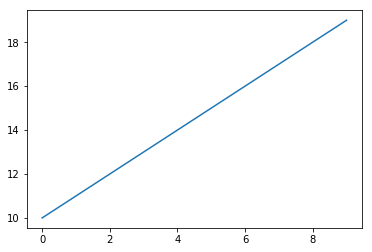

In [3]:
# Sample data
x = np.arange(10)
y = np.arange(10, 20)

# Make the plot, then show the plot
plt.plot(x, y)
plt.show()

You can customize a bunch of features within the plot:
* `markersize` sets the symbol size 
* `color` sets the color
* The first argument after y sets the marker shape. Try: `x`, `.`, `o`, `+`, `--`, `-.`, `:`

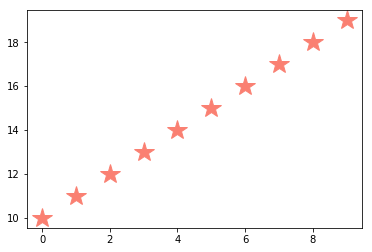

In [4]:
plt.plot(x, y, '*', markersize=20, color='salmon')  
plt.show()

Let's plot a sine function:

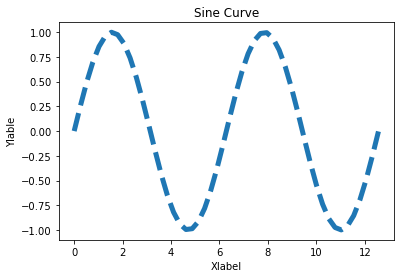

In [5]:
# Let's make x go from zero to 4*pi
x = np.linspace(0, 4*np.pi, 50)
y = np.sin(x)

# This will be a thick dashed line:
plt.plot(x, y, linestyle='--', linewidth=5) 

# Add labels to the axes
plt.xlabel('Xlabel') 
plt.ylabel('Ylable')

# Set the plot title
plt.title('Sine Curve')
plt.show()

Let's plot a figure with errorbars:

In [6]:
plt.errorbar?

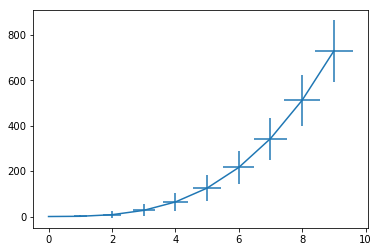

In [7]:
# Let's plot y=x^3
x = np.arange(10)
y = x**3

# Let's make up some errorbars in x and y
xerr_values = 0.2 * np.sqrt(x)
yerr_values = 5 * np.sqrt(y)

# Call the errorbar function 
plt.errorbar(x, y, xerr=xerr_values, yerr=yerr_values)
plt.show()

There are three options for log-plots: `plt.loglog()`, `plt.semilogx()`, `plt.semilogy()`

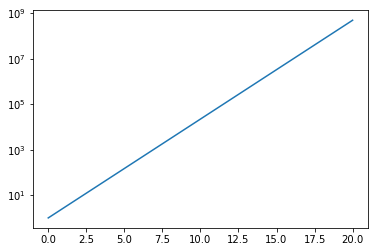

In [8]:
x = np.linspace(0, 20)
y = np.exp(x)

plt.semilogy(x, y) 
plt.show()

To add a legend to your plot, include the `label` argument in the plot command, then call `plt.legend()` at the end of the plotting commands, before `plt.show()`.

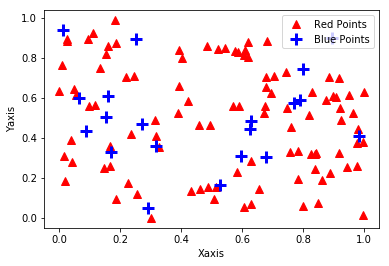

In [9]:
xred = np.random.rand(100)
yred = np.random.rand(100)

xblue = np.random.rand(20)
yblue = np.random.rand(20)

plt.plot(xred, yred, '^', color='red', markersize=8, 
         label='Red Points')

plt.plot(xblue, yblue, '+', color='blue', markersize=12, 
         markeredgewidth=3, label='Blue Points')

plt.xlabel('Xaxis')
plt.ylabel('Yaxis')

plt.legend()

# You can also place the legend in different places using this: 
# plt.legend(loc='lower left')
plt.show()

To save figures in python you just use `plt.savefig()`:

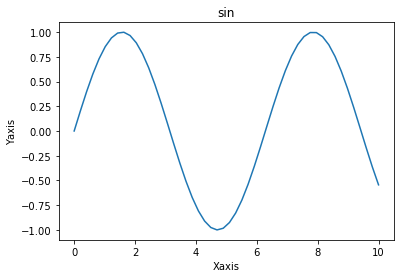

In [10]:
x = np.linspace(0, 10)
y = np.sin(x)

plt.plot(x, y)
plt.title('sin')
plt.xlabel('Xaxis')
plt.ylabel('Yaxis')

# just give savefig the file name, or path to file name that you want to write
plt.savefig('sineplot.png') 
plt.show()

Let's make a log-log plot displaying Kepler's law:

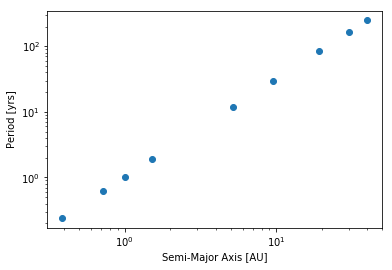

In [11]:
# Semimajor-axis in units of AU:
a_AU = np.array([0.387, 0.723, 1. , 1.524, 5.203, 9.537, 19.191, 30.069, 39.482])

# Orbital period in units of years
T_yr = np.array([0.24, 0.62, 1., 1.88, 11.86, 29.46, 84.01, 164.8, 247.7])

# Let's set gravity and mass of the sun in [cgs] units:
G = 6.67e-8
Msun = 1.99e+33 

plt.loglog(a_AU, T_yr, 'o')
plt.xlabel('Semi-Major Axis [AU]')
plt.ylabel('Period [yrs]')
plt.show()

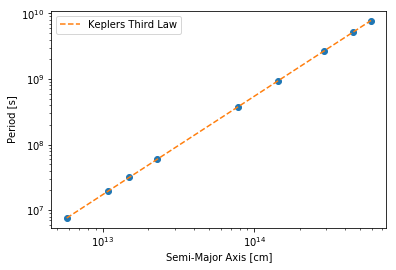

In [12]:
# now plot a function over the data
# as you work more in python you will learn how to actually fit models to your data 
def keplers_third_law(a, M):
    return np.sqrt((4*np.pi**2 * a**3) / (G * M))

# Convert semimajor-axis into centimeters
a_cm = a_AU * 1.496e+13 

# Convert period into seconds
T_s = T_yr * 3.154e+7

plt.loglog(a_cm, T_s, 'o')
plt.loglog(a_cm, keplers_third_law(a_cm, Msun), '--', 
           label='Keplers Third Law') # try swapping out Msun with something else and see what it looks like 
plt.xlabel('Semi-Major Axis [cm]')
plt.ylabel('Period [s]')
plt.legend(loc='best')
plt.show()

## Scatter Plots 

In [13]:
# first let's read in some data to use for plotting
galaxy_table = ascii.read('data/mygalaxy.dat')
galaxy_table[:5]

col1,col2
float64,float64
49.3317,3.74013
50.3509,4.76035
65.766,1.99268
46.5797,4.27444
25.0454,0.277328


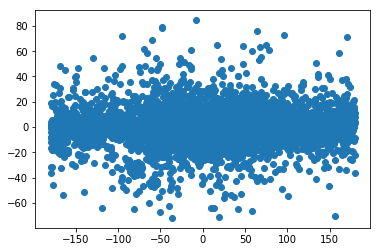

In [14]:
# simple scatter plot
plt.scatter(galaxy_table['col1'], galaxy_table['col2'])
plt.show()

**SIDE NOTE:** If you are running things in the IPython environment or from a script you would want to do something like the following to get your plots to show up in a new window:
```python
plt.scatter(galaxy_table['col1'], galaxy_table['col2'])
plt.show()
```

In an IPython Notebook, you will see the plot outputs whether or not you call `plt.show()` because we've used the `%matplotlib inline` magic function.

Let's break down these basic examples:
- We are running functions called "plot" or "scatter" that take specific arguments.
- The most basic arguments that these functions take are in the form of (x,y) values for the plot, and we get these from a data table. 
- We can use more specific arugments like 'o' to customize things like the plot symbol (marker) that we are using. 

With plt.scatter() you can change things like point color, point size, point edge color and point type. The argument syntax for adding these options are as follows: 

- color = 'colorname'; could be 'b' for blue, 'k' for black, 'r' for red
- s = number; changes marker size
- markeredgecolor = `None` or 'colorname'
- marker = 'symbolname', i.e. `'s'` for square, `'o'` for circle, `'+'` for cross, `'x'` for x, `'*'` for star, `'^'` for triangle, etc.

Let's do an example:

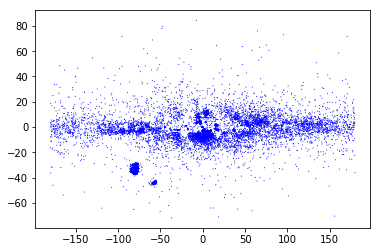

In [15]:
plt.scatter(galaxy_table['col1'], galaxy_table['col2'], 
            color='blue', s=1, edgecolor='None', marker='o')
plt.show()

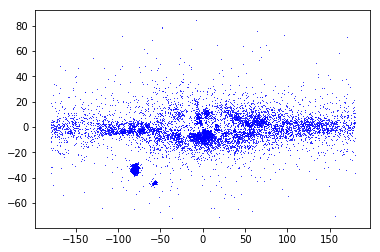

In [16]:
# here would be the equivalent statement using plt.plot(), note that the syntax is a little different 
plt.plot(galaxy_table['col1'], galaxy_table['col2'], 'o', 
         color='blue', markersize=1, markeredgecolor='None')
plt.show()

The plot is starting to look better, but there is one really important thing that is missing: **axis labels.** These are very easy to put in in matplotlib using ```plt.xlabel() and plt.ylabel().``` These functions take strings as their arguments for the labels, but can also take other arguments that case the text format: 

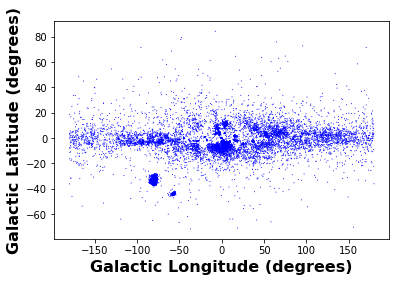

In [17]:
plt.scatter(galaxy_table['col1'], galaxy_table['col2'], color='blue', 
            s=1, edgecolor='None', marker='o')

plt.xlabel('Galactic Longitude (degrees)', 
           fontweight='bold', size=16)
plt.ylabel('Galactic Latitude (degrees)', 
           fontweight='bold', size=16)
plt.show()

We can also change things like the axis limits with ```plt.xlim()``` and ```plt.ylim().``` For these we just want to feed it a range of values for each axis: 

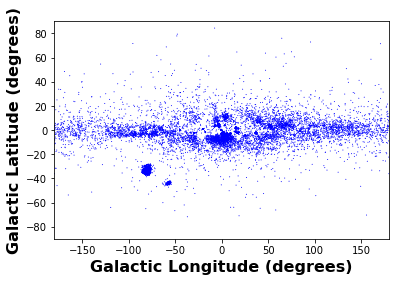

In [18]:
plt.scatter(galaxy_table['col1'], galaxy_table['col2'], 
            color='blue', s=1, edgecolor='None', marker='o')

plt.xlabel('Galactic Longitude (degrees)', 
           fontweight='bold', size=16)
plt.ylabel('Galactic Latitude (degrees)', 
           fontweight='bold', size=16)

plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

The axis labels are easy to read, but the numbers and tick marks on the axis are pretty small. We can tweak lots of little things about how the tick marks look, how they are spaced, and if we want to have a grid to guide the reader's eyes. I will give just a couple of examples here: 

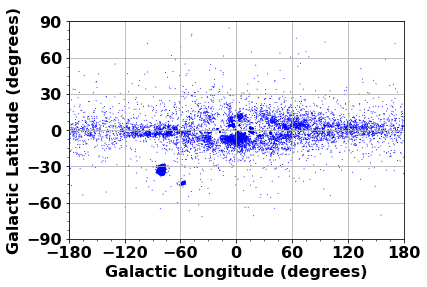

In [19]:
plt.scatter(galaxy_table['col1'], galaxy_table['col2'], 
            color='blue', s=1, edgecolor='None', marker='o')

# Labels
plt.xlabel('Galactic Longitude (degrees)', 
           fontweight='bold', size=16)
plt.ylabel('Galactic Latitude (degrees)', 
           fontweight='bold', size=16)

# Set limits
plt.xlim([-180,180])
plt.ylim([-90,90])

# Choose axis ticks
plt.xticks(range(-180,210,60), fontsize=16, fontweight='bold') # change tick spacing, font size and bold
plt.yticks(range(-90,120,30), fontsize=16, fontweight='bold')

# turn on minor tick marks 
plt.minorticks_on()

plt.grid() # turn on a background grip to guide the eye 
plt.show()

By default the figure is square, but maybe this is not the best way to represent our data. If this is the case we can change the size of the figure: 

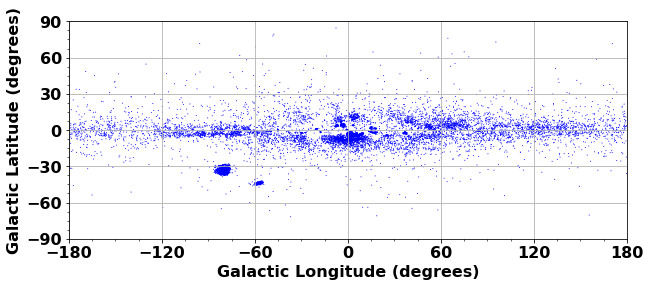

In [20]:
plt.figure(figsize=(10,4)) # change figure size 
plt.scatter(galaxy_table['col1'], galaxy_table['col2'], 
            color='blue', s=1, edgecolor='None', marker='o')

# Labels
plt.xlabel('Galactic Longitude (degrees)', 
           fontweight='bold', size=16)
plt.ylabel('Galactic Latitude (degrees)', 
           fontweight='bold', size=16)

# Set limits
plt.xlim([-180,180])
plt.ylim([-90,90])

# Choose axis ticks
plt.xticks(range(-180,210,60), fontsize=16, fontweight='bold') # change tick spacing, font size and bold
plt.yticks(range(-90,120,30), fontsize=16, fontweight='bold')

# turn on minor tick marks 
plt.minorticks_on()

plt.grid() # turn on a background grip to guide the eye 
plt.show()

The last thing I'll mention here is how to put text on plots. This too is simple as long as you specify (x,y) coordinates for the text. 

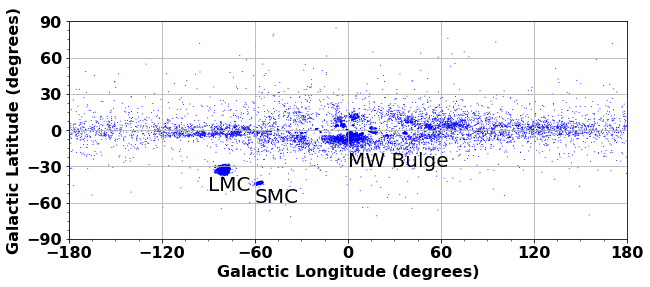

In [21]:
plt.figure(figsize=(10,4)) # change figure size 
plt.scatter(galaxy_table['col1'], galaxy_table['col2'], 
            color='blue', s=1, edgecolor='None', marker='o')

# the next three lines put text on the figure at the specified coordinates
plt.text(-90, -50, 'LMC', fontsize=20) 
plt.text(-60, -60, 'SMC', fontsize=20)
plt.text(0, -30, 'MW Bulge', fontsize=20)

plt.xlabel('Galactic Longitude (degrees)', 
           fontweight='bold', size=16)
plt.ylabel('Galactic Latitude (degrees)', 
           fontweight='bold', size=16)

plt.xlim([-180,180])
plt.ylim([-90,90])

plt.xticks(range(-180,210,60), fontsize=16, fontweight='bold') # change tick spacing, font size and bold
plt.yticks(range(-90,120,30), fontsize=16, fontweight='bold')
plt.minorticks_on() # turn on minor tick marks 
plt.grid() # turn on a background grip to guide the eye 
plt.show()

## Exercise 1 ##
Take the plot of that demonstrates Kepler's laws in our solar system, and:

- label each data point to the correct planet. 
- change the size of axes label to make them clearer.
- make any aesthetic changes that you think enhances the meaning you're tryin to convey with the plot (maybe you want to convey that each planet is a different size, and so change the marker size; maybe you want to convey that inner planets are rocky and outer planets are gaseous, so change the marker colour for a subset of them; etc)

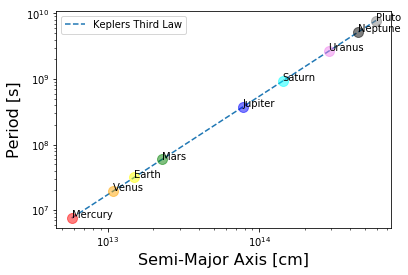

In [22]:
names = ['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune','Pluto']
colors = ['red','orange','yellow','green','blue','cyan','violet','black','grey']
plt.loglog(a_cm, keplers_third_law(a_cm, Msun), '--', 
           label='Keplers Third Law')
for i in range(len(a_cm)):
    plt.loglog(a_cm[i], T_s[i], 'o',color=colors[i],markersize=10,alpha=0.5)
    plt.text(a_cm[i],T_s[i],names[i])
plt.xlabel('Semi-Major Axis [cm]',size=16)
plt.ylabel('Period [s]',size=16)
plt.legend(loc='best')
plt.show()

## Histograms 

Histograms can be a great way to visualize data, and they are (surprise) easy to make it python! The basic command is 
```python
    num, bins, patches = plt.hist(array, bins=number)
```
Num refers to the number of elements in each bin, and bins refers to each bin on the x-axis. Note that bins actually gives you bin EDGES, so there will always be num+1 number of bins. We can ignore patches for now. As arguments plt.hist() takes an array and the number of bins you would like (default is bins=10). Some other optional arguments for plt.hist are: 

- **range:** lower and upper range of bins 
- **normed:** set to 'True' or 'False.' If true it will return a normalized probability distribution instead of just raw number counts for the y-axis. 
- **histtype:** can be step to something like 'step', 'stepfilled', or 'bar' for the histogram style. 
- **weights:** an array of values that must be of the same size as the number of bins. It controls the factor by which the number counts are weighted, i.e. it makes your number counts into number_counts*weight. 

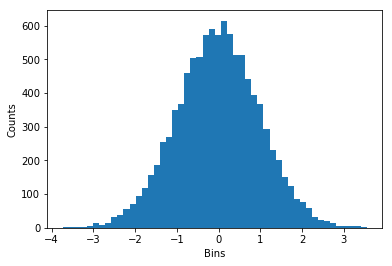

In [31]:
# plots histogram where the y-axis is counts 
x = np.random.randn(10000)
num, bins, patches = plt.hist(x, bins=50)
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

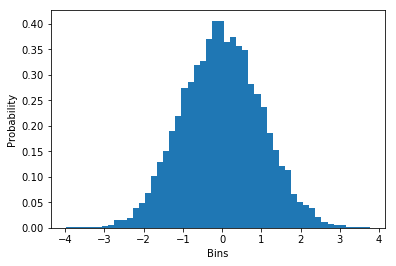

In [25]:
# plots histogram where the y-axis is a probability distribution 
plt.hist(x, bins=50, normed=True)
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

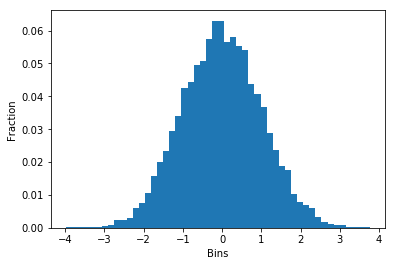

In [26]:
# plots a histogram where the y-axis is a fraction of the total 
weights = np.ones_like(x)/len(x)
plt.hist(x, bins=50, weights=weights)
plt.ylabel('Fraction')
plt.xlabel('Bins')
plt.show()

In [34]:
# print out num and bins and see what they look like! what size is each array?
# how would you plot this histogram using plt.plot? what is the x value and what is the y value?
print(num)
print(len(num))
print(bins)
print(len(bins))

[   2.    1.    2.    1.    4.   13.    9.   13.   32.   37.   56.   70.
   95.  119.  158.  186.  254.  271.  351.  368.  459.  505.  506.  573.
  591.  574.  615.  576.  513.  512.  442.  393.  369.  292.  231.  201.
  152.  123.   87.   78.   58.   32.   22.   21.   13.    6.    4.    4.
    4.    2.]
50
[-3.74068611 -3.59474535 -3.4488046  -3.30286384 -3.15692308 -3.01098232
 -2.86504156 -2.7191008  -2.57316004 -2.42721928 -2.28127852 -2.13533777
 -1.98939701 -1.84345625 -1.69751549 -1.55157473 -1.40563397 -1.25969321
 -1.11375245 -0.96781169 -0.82187094 -0.67593018 -0.52998942 -0.38404866
 -0.2381079  -0.09216714  0.05377362  0.19971438  0.34565514  0.4915959
  0.63753665  0.78347741  0.92941817  1.07535893  1.22129969  1.36724045
  1.51318121  1.65912197  1.80506273  1.95100348  2.09694424  2.242885
  2.38882576  2.53476652  2.68070728  2.82664804  2.9725888   3.11852956
  3.26447031  3.41041107  3.55635183]
51


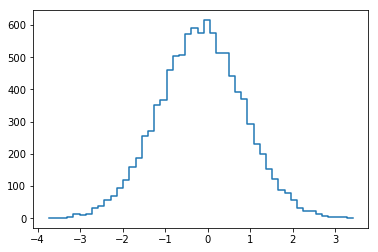

In [40]:
plt.plot(bins[:-1],num,drawstyle='steps')

## Subplots

Subplots are a way put multiple plots in what amounts to the same figure; think of subplots like an array of plots! The following picture is helpful for understanding how matplotlib places subplots based on row, column, and figure number:

<img src="images/subplot-grid.png">

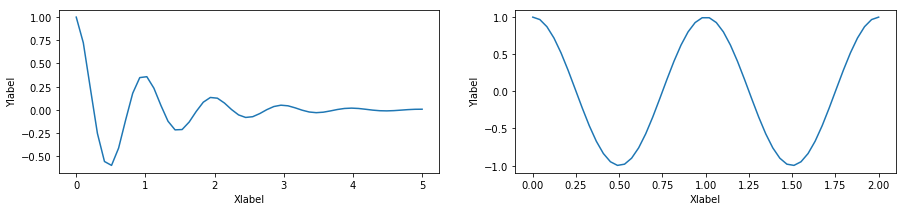

In [41]:
# make two side by side plots 

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.figure(figsize=[15,3])
plt.subplot(1,2,1) # 1 row, 2 columns, 1st figure 
plt.plot(x1,y1)
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')

plt.subplot(1,2,2) # 1 row, 2 columns, 2nd figure 
plt.plot(x2,y2)
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')
plt.show()


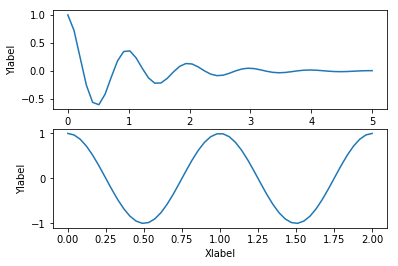

In [43]:
# stack two plots on top of one another

plt.subplot(2,1,1) # 2 rows, 1 column, 1st figure 
plt.plot(x1,y1)
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')

plt.subplot(2,1,2) # 2 rows, 1 column, 2nd figure 
plt.plot(x2,y2)
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')

plt.savefig('test_plot_name.pdf')
plt.show()


You can do fancier things with subplots like have different plots share the same axis, put smaller plots as insets to larger plots, etc. Again, take a look at things like the matplotlib library for examples of different plots. 

## Plotting Exoplanets 

Let's try to make some plots with a new dataset. The file that we'll use is taken from [exoplanets.eu](exoplanets.eu). 

In [44]:
# don't worry about this way to read in files right now 
import pandas as pd 
exoplanets = pd.read_csv('data/exoplanet.eu_catalog_1022.csv')

In [45]:
# get rid of some rows with missing values to be safe
exoplanets = exoplanets[np.isfinite(exoplanets['orbital_period'])]

In [46]:
# let's see what the data table looks like
exoplanets.head()

,# name,mass,mass_error_min,mass_error_max,radius,radius_error_min,radius_error_max,orbital_period,orbital_period_error_min,orbital_period_error_max,...,mag_k,star_distance,star_metallicity,star_mass,star_radius,star_sp_type,star_age,star_teff,star_detected_disc,star_magnetic_field
0,11 Com b,19.40,1.50,1.50,NaN,NaN,NaN,326.03,0.32,0.32,...,NaN,110.60,-0.35,2.70,19.000,G8 III,NaN,4742.0,NaN,NaN
1,11 UMi b,10.50,2.47,2.47,NaN,NaN,NaN,516.22,3.25,3.25,...,NaN,119.50,0.04,1.80,24.080,K4III,1.56,4340.0,NaN,NaN
2,14 And b,5.33,0.57,0.57,NaN,NaN,NaN,185.84,0.23,0.23,...,2.33,76.40,-0.24,2.20,11.000,K0III,NaN,4813.0,NaN,NaN
3,14 Her b,4.64,0.19,0.19,NaN,NaN,NaN,1773.40,2.50,2.50,...,NaN,18.10,0.43,0.90,0.708,K0 V,5.10,5311.0,NaN,NaN
4,16 Cyg B b,1.68,0.07,0.07,NaN,NaN,NaN,799.50,0.60,0.60,...,NaN,21.41,0.08,1.01,0.980,G2.5 V,8.00,5766.0,NaN,NaN


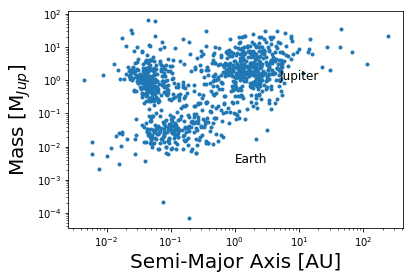

In [47]:
# plot distance from host star versus mass (in jupiter masses) for each exoplanet 
plt.loglog(exoplanets['semi_major_axis'], exoplanets['mass'],'.')
plt.annotate("Earth", xy=(1,1/317.), size=12)
plt.annotate("Jupiter", xy=(5,1), size=12)
plt.xlabel('Semi-Major Axis [AU]',size=20)
plt.ylabel('Mass [M$_{Jup}$]', size=20)

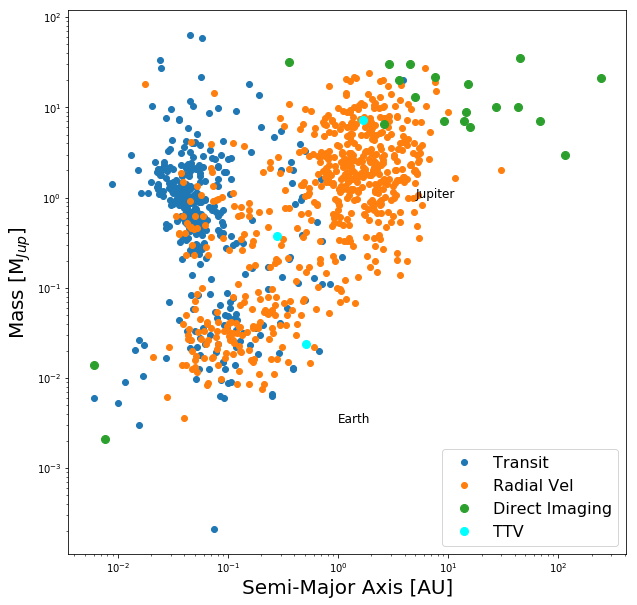

In [48]:
# let's try to find out if the blobs above separate out by detection type
plt.figure(figsize=(10,10))
transits = exoplanets[exoplanets['detection_type'] == 'Primary Transit']
radial_vel = exoplanets[exoplanets['detection_type'] == 'Radial Velocity']
imaging = exoplanets[exoplanets['detection_type'] == 'Imaging']
ttv = exoplanets[exoplanets['detection_type'] == 'TTV']
plt.loglog(transits['semi_major_axis'], transits['mass'], '.', label='Transit',markersize=12)
plt.loglog(radial_vel['semi_major_axis'], radial_vel['mass'], '.', label='Radial Vel', markersize=12)
plt.loglog(imaging['semi_major_axis'], imaging['mass'], '.', label='Direct Imaging', markersize=16)
plt.loglog(ttv['semi_major_axis'], ttv['mass'], '.', label='TTV', color='cyan', markersize=16)
plt.annotate("Earth", xy=(1,1/317.), size=12)
plt.annotate("Jupiter", xy=(5,1), size=12)
plt.xlabel('Semi-Major Axis [AU]', size=20)
plt.ylabel('Mass [M$_{Jup}$]', size=20)
plt.legend(loc=4, prop={'size':16})



/astro/apps6/opt/anaconda2.0/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


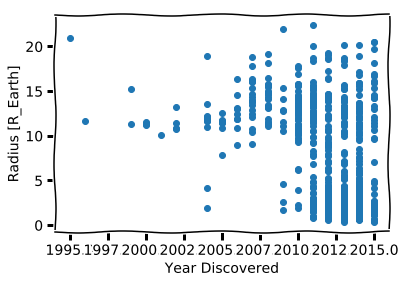

In [49]:
# and now just for fun an xkcd style plot! 
plt.xkcd()
plt.scatter(exoplanets['discovered'], exoplanets['radius']*11)
plt.xlabel('Year Discovered')
plt.ylabel('Radius [R_Earth]')

# to revert back to regular plotting:
plt.rcdefaults()

## Exercise 2 ##
Take the plot of exoplanet detections, and edit it so that Earth, Mars, and Jupiter are plotted as data points *with* labels, instead of Earth and Jupiter being just text annotations. 

After you've made the changes, let's try to interpret this plot. Answer the following questions:

- What method is best to look for Jupiter analogues? 
- Which method is most successful in detecting the masses of planets across a large range of orbital separations? *Why do you think this is?*
- Have we found a true Earth analog? 
- List what types of worlds are represented in the figure, and what region of parameter space they occupy. Name at least 3. (e.g., "Jupiter analogues are represented in this figure by data points occupying the 5-10 AU and 1-5 $M_J$ space, in the upper right section")

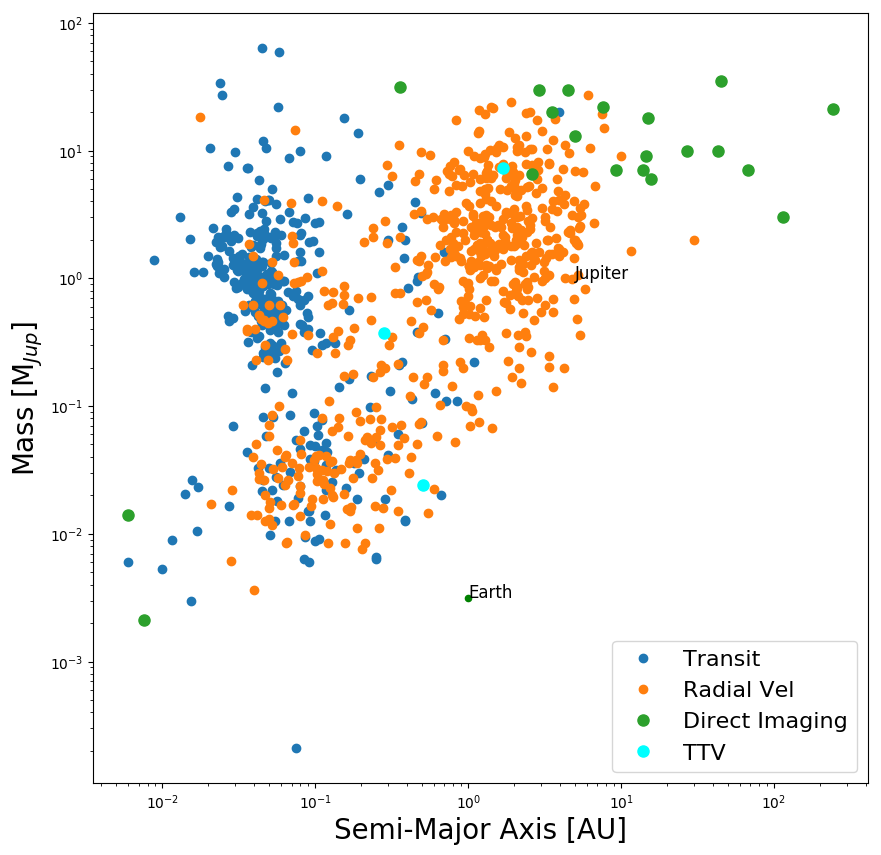

In [52]:
# let's try to find out if the blobs above separate out by detection type
plt.figure(figsize=(10,10))
transits = exoplanets[exoplanets['detection_type'] == 'Primary Transit']
radial_vel = exoplanets[exoplanets['detection_type'] == 'Radial Velocity']
imaging = exoplanets[exoplanets['detection_type'] == 'Imaging']
ttv = exoplanets[exoplanets['detection_type'] == 'TTV']
plt.loglog(transits['semi_major_axis'], transits['mass'], '.', label='Transit',markersize=12)
plt.loglog(radial_vel['semi_major_axis'], radial_vel['mass'], '.', label='Radial Vel', markersize=12)
plt.loglog(imaging['semi_major_axis'], imaging['mass'], '.', label='Direct Imaging', markersize=16)
plt.loglog(ttv['semi_major_axis'], ttv['mass'], '.', label='TTV', color='cyan', markersize=16)
plt.annotate("Earth", xy=(1,1/317.), size=12)
plt.annotate("Jupiter", xy=(5,1), size=12)
plt.xlabel('Semi-Major Axis [AU]', size=20)
plt.ylabel('Mass [M$_{Jup}$]', size=20)
plt.legend(loc=4, prop={'size':16})

plt.scatter(1.0,0.00314636,color='g',s=20)


## Hertzsprung-Russell Diagram

A Hertzsprung-Russell (HR) diagram is a type of scatter plot that is widely used by astronomers. On the x-axis is the color (B-V value), or effective temperature, and on the y-axis is the absolute magnitude, or luminosity. In other words, it is a plot of a star's brightness (y-axis) against its temperature (x-axis). As you can see in the plot below, temperature increases to the left, and brightness increases as you move up the y-axis. Note that this is an idealized depiction of an HR diagram. Observations will always show more scatter! 

It is also apparent that when plotted in this way, stars fall into distinct groups. The most prominent group is the line extending diagonally across the plot. This is referred to as the "main sequence," and is the stage of stellar evolution where stars spend most of their time. During this stage stars are fusing hydrogen into helium in their cores. When stars eventually move off the main sequence they undergo different pathways of evolution depending on their masses. Some stars will fuse all the way up to iron in their cores, while some, like our sun, will only get to fusing helium. 

<img src="images/hr.png">